<ipython-input-4-31e65f1aa9c8>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-4-31e65f1aa9c8>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('rainbow', lut=n_w)


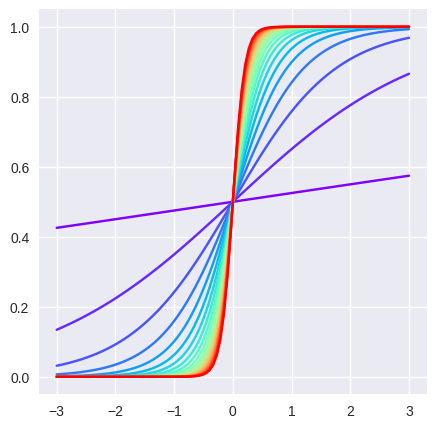

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')

x = np.linspace(-3,3,100)

n_w = 20
w_list = np.linspace(0.1,10,n_w)
cmap = cm.get_cmap('rainbow', lut=n_w)

fig,ax = plt.subplots(figsize=(5,5))
for w_idx, w in enumerate(w_list):
    z = x*w
    sigmoid = 1/(1 + np.exp(-z))

    ax.plot(x, sigmoid, color=cmap(w_idx))

# Logistic Regreesion with 1 feature

<ipython-input-30-fd2bc6045bf1>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-30-fd2bc6045bf1>:30: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (x_data > db).astype(np.int)
<ipython-input-30-fd2bc6045bf1>:37: MatplotlibDeprecationWarning: The get_cmap function was de

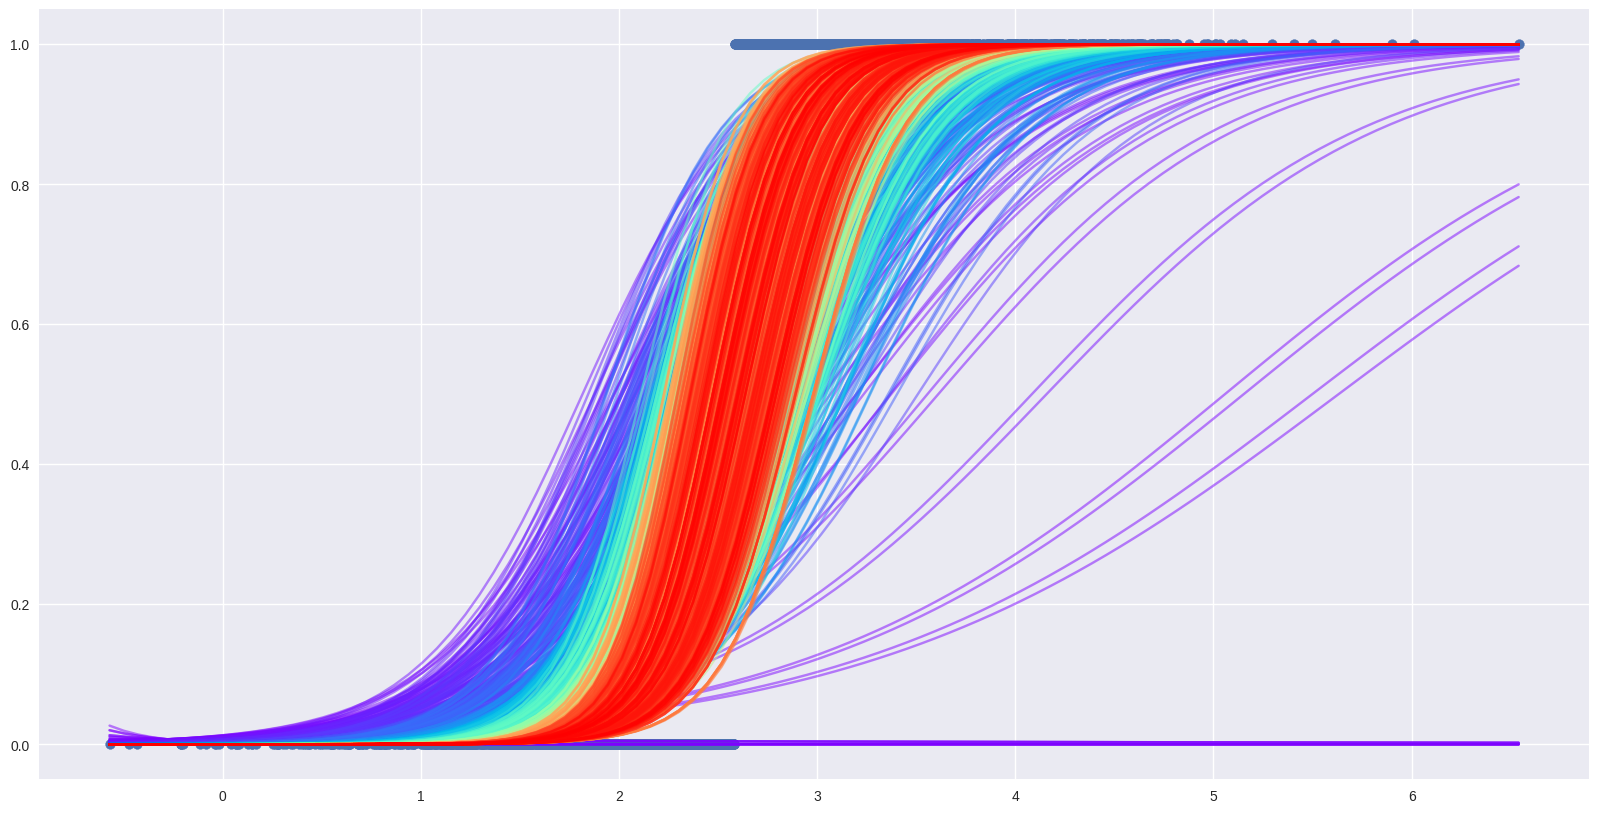

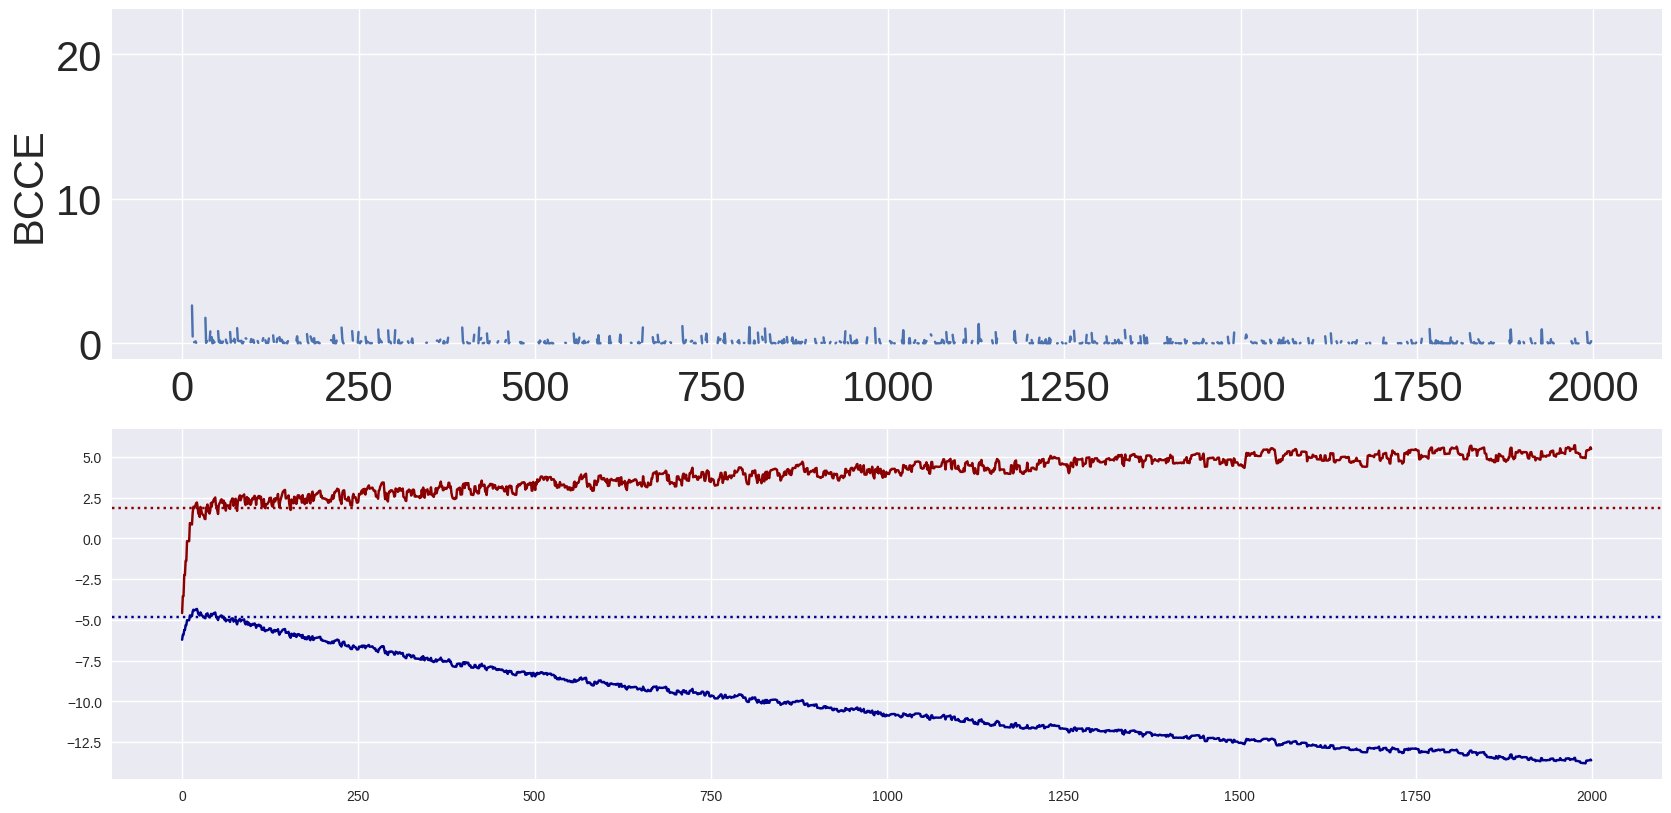

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params

# t_w, t_b = 1, 0
N = 2000
lr = 0.3
t_w = np.random.normal(-3,3, (1,))
t_b = np.random.normal(-3,3, (1,))

w = np.random.normal(-3,3, (1,))
b = np.random.normal(-3,3, (1,))


# generate dataset 01
# x_data = np.random.randn(N, )
# y_data = x_data*t_w + t_b
# y_data = 1/(1+np.exp(-y_data))
# y_data = (y_data > .5).astype(np.int) # binary classfication 을 위한 dataset 완성



# generate dataset 02
db = -t_b/t_w # decision bound 
x_data = np.random.normal(db, 1, size=(N,)) # decision bounds를 기준으로 
y_data = (x_data > db).astype(np.int)
# x_data += np.random.normal(0,1,size=(N,)) # 노이즈 포함. 

fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(x_data, y_data)

x_range = np.linspace(x_data.min(), x_data.max(), 100) # x_data를 다시 범위 안에서 설정하는 듯 함. 
cmap = cm.get_cmap('rainbow', lut=N)
J_track = list()
w_track, b_track = list(), list()
for data_idx, (x,y) in enumerate(zip(x_data, y_data)):
    w_track.append(w) # 밑에서 update하고 다시 들어옴
    b_track.append(b) # 밑에서 update하고 다시 들어옴

    # visualize updated model
    y_range = w*x_range + b
    y_range = 1/(1 + np.exp(-y_range))
    ax.plot(x_range, y_range, color=cmap(data_idx), alpha=.5)

    # forward propagation
    z = x*w + b
    pred = 1/(1+np.exp(-z))
    J = -(y*np.log(pred + (1-y)*np.log(1-pred)))
    J_track.append(J)

    # jacobians
    dJ_dpred = (pred - y)/(pred*(1-pred))
    dpred_dz = pred*(1-pred)
    dz_dw = x
    dz_db = 1

    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dw = dJ_dz * dz_dw
    dJ_db = dJ_dz * dz_db

    # parameter update
    w = w - lr*dJ_dw
    b = b - lr*dJ_db

# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel("BCCE", fontsize=30)
axes[0].tick_params(labelsize=30)

axes[1].axhline(y=t_w, color='darkred', linestyle=':')
axes[1].plot(w_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')


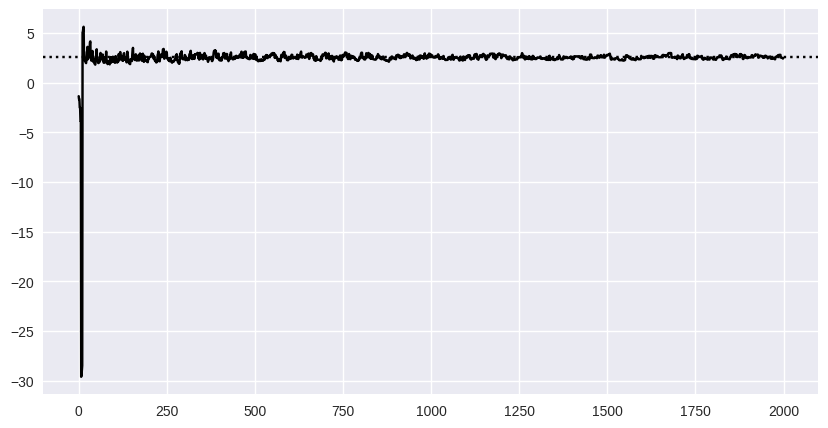

In [34]:
w_track = np.array(w_track)
b_track = np.array(b_track)

db_track = -b_track/w_track
db = -t_b/t_w

fig, ax = plt.subplots(figsize=(10,5))
ax.axhline(y=db, color='black', linestyle=':')
ax.plot(db_track, color='black') 

# decision boundary에 유지한 상태에서 loss를 줄이기 위해 점점 step function에 가까워지는 것이다. 

# Logistic Regression with n features (multivariate logistic regression)

<ipython-input-47-ec498716d3ee>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-47-ec498716d3ee>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_data = (y_data > 0.5).astype(np.int)
<ipython-input-47-ec498716d3ee>:31: DeprecationWarning: `np.int` is a deprecated alias for th

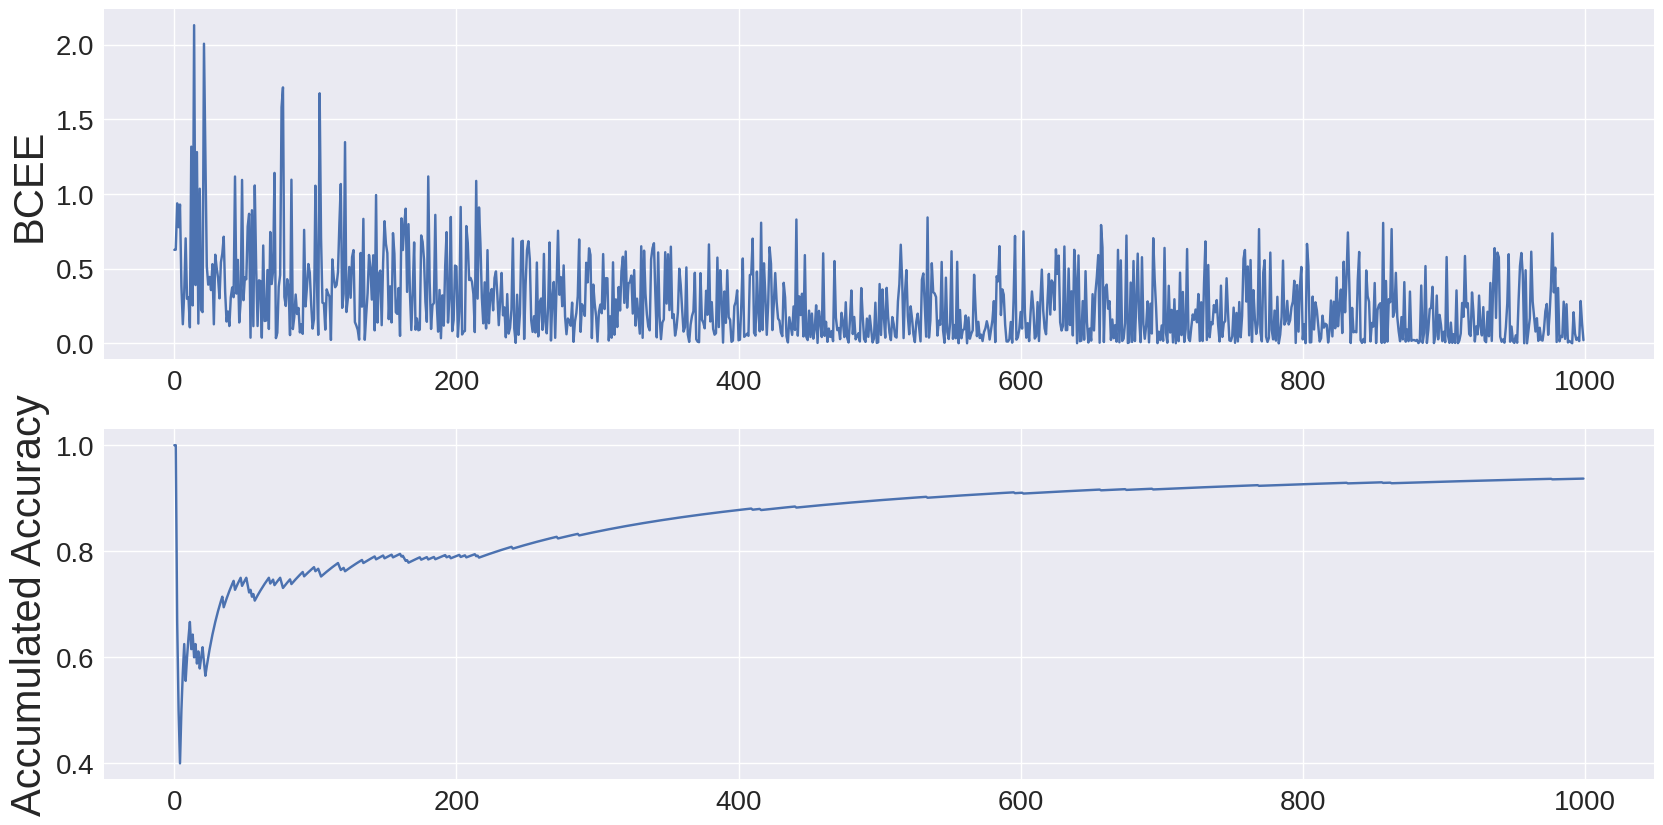

In [47]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 1000, 3
lr = .03
t_W = np.random.uniform(-1,1, (n_feature, 1))
t_b = np.random.uniform(-1,1, (1, ))

W = np.random.uniform(-1,1, (n_feature, 1))
b = np.random.uniform(-1,1, (1, 1))

# generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1/(1+np.exp(-y_data))
y_data = (y_data > 0.5).astype(np.int)

J_track, acc_track = list(), list()
n_correct = 0
for data_idx, (X,y) in enumerate(zip(x_data, y_data)):
    # forward propagation
    z = X @ W + b
    pred = 1/(1+np.exp(-z))
    J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
    J_track.append(J.squeeze())

    # calculate accmulated accuracy
    pred_ = (pred > 0.5).astype(np.int).squeeze()
    if pred_ == y:
        n_correct +=1 
    acc_track.append(n_correct/(data_idx + 1))

    # jacobians
    dJ_dpred = (pred - y)/(pred*(1-pred))
    dpred_dz = pred*(1-pred)
    dz_dW = X.reshape(1,-1)
    dz_db = 1

    # backpropagation
    dJ_dz = dJ_dpred * dpred_dz
    dJ_dW = dJ_dz * dz_dW
    dJ_db = dJ_dz * dz_db

    # paramter update
    W = W - lr*dJ_dW.T # transpose
    b = b - lr*dJ_db

# visualize results
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(acc_track)

axes[0].set_ylabel('BCEE', fontsize=30)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated Accuracy', fontsize=30)
axes[1].tick_params(labelsize=20) 

## 변동이 크게 보임 

In [ ]:
ㅠ